In [7]:
!#pip install imblearn

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, roc_auc_score, plot_roc_curve
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import *

In [9]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [10]:
moto = pd.read_csv("../../2_Only_Permissions_Datasets/Permission_MotoDroid.csv")

# Separação dos dados

### Separação de conjuntos de treino, teste e validação

In [11]:
train, test = train_test_split(moto,test_size = 0.2,stratify=moto["class"],random_state=42)

In [12]:
X_TRAIN = train.drop("class", axis=1)
Y_TRAIN = train["class"]
x_train, x_validation, y_train, y_validation = train_test_split(X_TRAIN, Y_TRAIN, test_size = 0.375, stratify = Y_TRAIN, random_state=42)

In [13]:
# Balanceamento de dados de treino
rus = RandomUnderSampler()
x_train_balanced, y_train_balanced = rus.fit_resample(x_train, y_train)
x_train_balanced = pd.DataFrame(x_train_balanced)

In [14]:
x_test = test.drop("class", axis=1)
y_test = test["class"]

In [15]:
D_RandomForest = RandomForestClassifier()
B_RandomForest = RandomForestClassifier()

# HIPERPARÂMETROS PADRÕES

### Treino Desbalanceado

In [16]:
D_RandomForest.fit(x_train,y_train)

RandomForestClassifier()

In [17]:
print("Treino desbalanceado")
print("Curva ROC >> ", (cross_val_score(D_RandomForest, x_validation, y_validation, scoring="roc_auc", cv = 5).mean())*100,"%")
print("Acurácia >> ", (cross_val_score(D_RandomForest, x_validation, y_validation, scoring="accuracy", cv = 5).mean())*100,"%")
print("Precisão >> ", (cross_val_score(D_RandomForest, x_validation, y_validation, scoring="precision", cv = 5).mean())*100,"%")
print("F1-Score >> ", (cross_val_score(D_RandomForest, x_validation, y_validation, scoring="f1", cv = 5).mean())*100,"%")
print("Recall >> ", (cross_val_score(D_RandomForest, x_validation, y_validation, scoring="recall", cv = 5).mean())*100,"%")

Treino desbalanceado
Curva ROC >>  91.77321673832235 %
Acurácia >>  83.75139953565356 %
Precisão >>  83.97026983247981 %
F1-Score >>  83.85554855102416 %
Recall >>  83.60673272289502 %


In [18]:
print("Treino desbalanceado")
print("Curva ROC >> ",roc_auc_score(y_validation,D_RandomForest.predict(x_validation))*100,"%")
print("Acurácia >> ", accuracy_score(y_validation,D_RandomForest.predict(x_validation))*100,"%")
print("Precisão >> ", precision_score(y_validation,D_RandomForest.predict(x_validation))*100,"%")
print("F1-Score >> ", f1_score(y_validation,D_RandomForest.predict(x_validation))*100,"%")
print("Recall >> ", recall_score(y_validation,D_RandomForest.predict(x_validation))*100,"%")

Treino desbalanceado
Curva ROC >>  84.18973044635814 %
Acurácia >>  84.18758454832407 %
Precisão >>  84.61770927772741 %
F1-Score >>  84.18520745640409 %
Recall >>  83.75710439724799 %


### Treino Balanceado

In [19]:
B_RandomForest.fit(x_train_balanced,y_train_balanced)

RandomForestClassifier()

In [20]:
print("Treino balanceado")
print("Curva ROC >> ", (cross_val_score(B_RandomForest, x_validation, y_validation, scoring="roc_auc", cv = 5).mean())*100,"%")
print("Acurácia >> ", (cross_val_score(B_RandomForest, x_validation, y_validation, scoring="accuracy", cv = 5).mean())*100,"%")
print("Precisão >> ", (cross_val_score(B_RandomForest, x_validation, y_validation, scoring="precision", cv = 5).mean())*100,"%")
print("F1-Score >> ", (cross_val_score(B_RandomForest, x_validation, y_validation, scoring="f1", cv = 5).mean())*100,"%")
print("Recall >> ", (cross_val_score(B_RandomForest, x_validation, y_validation, scoring="recall", cv = 5).mean())*100,"%")

Treino balanceado
Curva ROC >>  91.76214199430926 %
Acurácia >>  83.84159120566255 %
Precisão >>  83.93821428586114 %
F1-Score >>  83.7472340498001 %
Recall >>  83.63667284265549 %


In [21]:
print("Treino balanceado")
print("Curva ROC >> ",roc_auc_score(y_validation,B_RandomForest.predict(x_validation))*100,"%")
print("Acurácia >> ", accuracy_score(y_validation,B_RandomForest.predict(x_validation))*100,"%")
print("Precisão >> ", precision_score(y_validation,B_RandomForest.predict(x_validation))*100,"%")
print("F1-Score >> ", f1_score(y_validation,B_RandomForest.predict(x_validation))*100,"%")
print("Recall >> ", recall_score(y_validation,B_RandomForest.predict(x_validation))*100,"%")

Treino balanceado
Curva ROC >>  84.12975482882119 %
Acurácia >>  84.12746129565609 %
Precisão >>  84.57816752343513 %
F1-Score >>  84.1203007518797 %
Recall >>  83.66736464253664 %


# TESTANDO HIPERPARÂMETROS

In [22]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

D_RS = RandomizedSearchCV(D_RandomForest, random_grid, random_state=42, scoring="roc_auc",cv = 5, n_iter=100, n_jobs=-1, verbose=2).fit(x_train,y_train)
B_RS = RandomizedSearchCV(B_RandomForest, random_grid, random_state=42, scoring="roc_auc",cv = 5, n_iter = 100, n_jobs=-1, verbose=2).fit(x_train_balanced,y_train_balanced)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   4.4s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   4.4s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   4.4s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   4.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   4.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   9.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; t

In [23]:
D_RS.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [24]:
B_RS.best_params_

{'n_estimators': 1800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

# HIPERPARÂMETROS OTIMIZADOS

In [25]:
OD_RandomForest = RandomForestClassifier(**D_RS.best_params_)
OB_RandomForest = RandomForestClassifier(**B_RS.best_params_)

In [26]:
OD_RandomForest.fit(x_train,y_train)

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5,
                       n_estimators=400)

In [27]:
print("Treino desbalanceado")
print("Curva ROC >> ", (cross_val_score(OD_RandomForest, x_validation, y_validation, scoring="roc_auc", cv = 5).mean())*100,"%")
print("Acurácia >> ", (cross_val_score(OD_RandomForest, x_validation, y_validation, scoring="accuracy", cv = 5).mean())*100,"%")
print("Precisão >> ", (cross_val_score(OD_RandomForest, x_validation, y_validation, scoring="precision", cv = 5).mean())*100,"%")
print("F1-Score >> ", (cross_val_score(OD_RandomForest, x_validation, y_validation, scoring="f1", cv = 5).mean())*100,"%")
print("Recall >> ", (cross_val_score(OD_RandomForest, x_validation, y_validation, scoring="recall", cv = 5).mean())*100,"%")

Treino desbalanceado
Curva ROC >>  91.83147006489641 %
Acurácia >>  83.94678657575568 %
Precisão >>  84.0192008121812 %
F1-Score >>  83.92454246123752 %
Recall >>  83.87592527948587 %


In [28]:
print("Treino desbalanceado")
print("Curva ROC >> ",roc_auc_score(y_validation,OD_RandomForest.predict(x_validation))*100,"%")
print("Acurácia >> ", accuracy_score(y_validation,OD_RandomForest.predict(x_validation))*100,"%")
print("Precisão >> ", precision_score(y_validation,OD_RandomForest.predict(x_validation))*100,"%")
print("F1-Score >> ", f1_score(y_validation,OD_RandomForest.predict(x_validation))*100,"%")
print("Recall >> ", recall_score(y_validation,OD_RandomForest.predict(x_validation))*100,"%")

Treino desbalanceado
Curva ROC >>  84.17402824859268 %
Acurácia >>  84.17255373515708 %
Precisão >>  84.50874020494274 %
F1-Score >>  84.19156282840414 %
Recall >>  83.87675740352977 %


In [29]:
OB_RandomForest.fit(x_train_balanced, y_train_balanced)

RandomForestClassifier(bootstrap=False, max_depth=30, max_features='sqrt',
                       min_samples_split=10, n_estimators=1800)

In [30]:
print("Treino balanceado")
print("Curva ROC >> ", (cross_val_score(OB_RandomForest, x_validation, y_validation, scoring="roc_auc", cv = 5).mean())*100,"%")
print("Acurácia >> ", (cross_val_score(OB_RandomForest, x_validation, y_validation, scoring="accuracy", cv = 5).mean())*100,"%")
print("Precisão >> ", (cross_val_score(OB_RandomForest, x_validation, y_validation, scoring="precision", cv = 5).mean())*100,"%")
print("F1-Score >> ", (cross_val_score(OB_RandomForest, x_validation, y_validation, scoring="f1", cv = 5).mean())*100,"%")
print("Recall >> ", (cross_val_score(OB_RandomForest, x_validation, y_validation, scoring="recall", cv = 5).mean())*100,"%")

Treino balanceado
Curva ROC >>  91.904175844861 %
Acurácia >>  83.93176027973766 %
Precisão >>  84.09779036989609 %
F1-Score >>  83.98840305863263 %
Recall >>  83.90577589216186 %


In [31]:
print("Curva ROC >> ",roc_auc_score(y_validation,OB_RandomForest.predict(x_validation))*100,"%")
print("Acurácia >> ", accuracy_score(y_validation,OB_RandomForest.predict(x_validation))*100,"%")
print("Precisão >> ", precision_score(y_validation,OB_RandomForest.predict(x_validation))*100,"%")
print("F1-Score >> ", f1_score(y_validation,OB_RandomForest.predict(x_validation))*100,"%")
print("Recall >> ", recall_score(y_validation,OB_RandomForest.predict(x_validation))*100,"%")

Curva ROC >>  84.18883575998186 %
Acurácia >>  84.18758454832407 %
Precisão >>  84.49262270400482 %
F1-Score >>  84.21368547418967 %
Recall >>  83.93658390667066 %


# HIPERPARÂMETROS PADRÕES X HIPERPARÂMETROS OTIMIZADOS

### Desbalanceado

/home/overycall/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/overycall/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/overycall/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use o

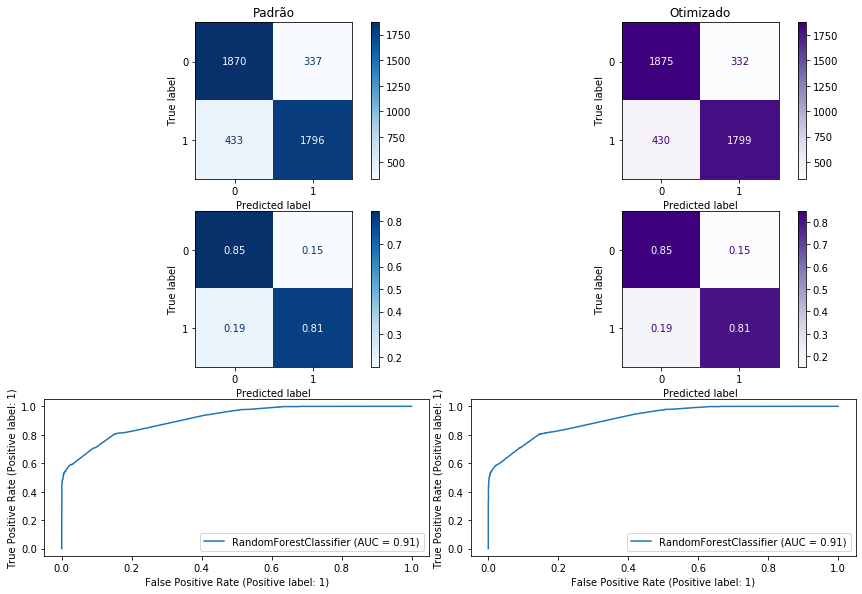

In [32]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12,8))
plt.tight_layout()
ax1.set(title="Padrão")
ax2.set(title="Otimizado")
plot_confusion_matrix(D_RandomForest, x_test, y_test,ax=ax1, cmap = "Blues", values_format="d")
plot_confusion_matrix(OD_RandomForest, x_test, y_test, ax=ax2, cmap= "Purples", values_format="d")
plot_confusion_matrix(D_RandomForest, x_test, y_test,ax=ax3, cmap = "Blues", normalize = "true")
plot_confusion_matrix(OD_RandomForest, x_test, y_test, ax=ax4, cmap= "Purples", normalize = "true")
plot_roc_curve(D_RandomForest,x_test, y_test, ax=ax5)
plot_roc_curve(OD_RandomForest,x_test, y_test, ax=ax6)

In [33]:
print("PADRÃO - ROC_AUC>>",roc_auc_score(y_test, D_RandomForest.predict(x_test))*100, "%")

PADRÃO - ROC_AUC>> 82.65232590214707 %


In [34]:
print("OTIMIZADO - ROC_AUC>>",roc_auc_score(y_test, OD_RandomForest.predict(x_test))*100, "%")

OTIMIZADO - ROC_AUC>> 82.83289659334679 %


### Balanceado

/home/overycall/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/overycall/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/overycall/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use o

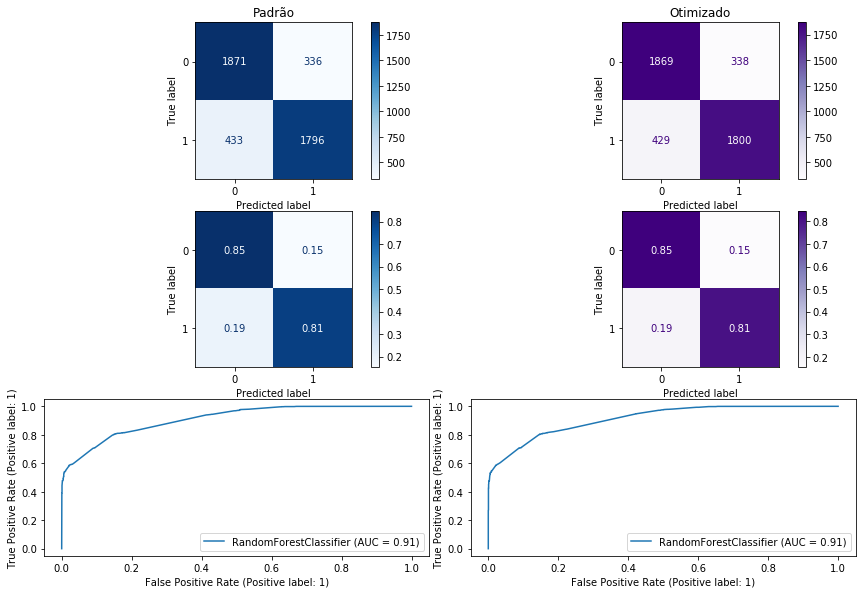

In [35]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12,8))
plt.tight_layout()
ax1.set(title="Padrão")
ax2.set(title="Otimizado")
plot_confusion_matrix(B_RandomForest, x_test, y_test,ax=ax1, cmap = "Blues", values_format="d")
plot_confusion_matrix(OB_RandomForest, x_test, y_test, ax=ax2, cmap= "Purples", values_format="d")
plot_confusion_matrix(B_RandomForest, x_test, y_test,ax=ax3, cmap = "Blues", normalize = "true")
plot_confusion_matrix(OB_RandomForest, x_test, y_test, ax=ax4, cmap= "Purples", normalize = "true")
plot_roc_curve(B_RandomForest,x_test, y_test, ax=ax5)
plot_roc_curve(OB_RandomForest,x_test, y_test, ax=ax6)

In [36]:
print("PADRÃO - ROC_AUC >>",roc_auc_score(y_test, B_RandomForest.predict(x_test))*100, "%")

PADRÃO - ROC_AUC >> 82.67498109018513 %


In [37]:
print("OTIMIZADO - ROC_AUC >>",roc_auc_score(y_test, OB_RandomForest.predict(x_test))*100, "%")

OTIMIZADO - ROC_AUC >> 82.71939704878824 %


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2d8ac86b-a893-46e4-9843-c480ae878176' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>